# Modeling

In [ ]:
%pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 22.7 MB/s eta 0:00:00


In [ ]:

from datetime import datetime
start_time = datetime.now()

import pandas as pd
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
import gc
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir("/content/drive/MyDrive/DSO562")

In [ ]:
%%time
vars = pd.read_csv('final.csv')
print(vars.shape)
vars.head()

(96397, 22)
CPU times: user 204 ms, sys: 47.8 ms, total: 251 ms
Wall time: 921 ms


,card_merch_total_14,card_zip3_max_14,Card_Merchdesc_count_7,merch_zip_max_7,Card_Merchnum_desc_avg_7,Card_Merchnum_desc_max_1,Card_Merchdesc_max_1,Card_Merchnum_desc_max_3,merch_zip_med_0,card_zip_max_0,...,Card_Merchnum_desc_max_0,card_merch_avg_7,card_zip_med_3,Card_Merchnum_desc_avg_3,card_zip3_avg_1,card_merch_avg_1,Card_Merchdesc_avg_1,Card_Merchnum_desc_avg_1,Recnum,Fraud
0,3.62,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,1,0
1,31.42,31.42,1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,2,0
2,178.49,178.49,1,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,3,0
3,3.62,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,4,0
4,7.24,3.62,2,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,5,0


In [ ]:
# set the number of variables desired here, and set the names of the y and record number properly
NVARS = 10

vars.rename(columns={'record':'Recnum'},inplace=True)
vars.rename(columns={'fraud_label':'Fraud'},inplace=True)
numvars = min(NVARS,len(vars)-2)
final_vars_list = ['Recnum','Fraud']
for i in range(numvars):
    final_vars_list.append(vars.columns[i])

final_vars_list

['Recnum',
 'Fraud',
 'card_merch_total_14',
 'card_zip3_max_14',
 'Card_Merchdesc_count_7',
 'merch_zip_max_7',
 'Card_Merchnum_desc_avg_7',
 'Card_Merchnum_desc_max_1',
 'Card_Merchdesc_max_1',
 'Card_Merchnum_desc_max_3',
 'merch_zip_med_0',
 'card_zip_max_0']

In [ ]:
vars = vars.filter(final_vars_list,axis=1)
vars.head()

,Recnum,Fraud,card_merch_total_14,card_zip3_max_14,Card_Merchdesc_count_7,merch_zip_max_7,Card_Merchnum_desc_avg_7,Card_Merchnum_desc_max_1,Card_Merchdesc_max_1,Card_Merchnum_desc_max_3,merch_zip_med_0,card_zip_max_0
0,1,0,3.62,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,1,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,1,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5,0,7.24,3.62,2,3.62,3.62,3.62,3.62,3.62,3.62,3.62


In [ ]:
vars.shape

(96397, 12)

In [ ]:
vars['Fraud'].sum()

1059

In [ ]:
vars.head(10)

,Recnum,Fraud,card_merch_total_14,card_zip3_max_14,Card_Merchdesc_count_7,merch_zip_max_7,Card_Merchnum_desc_avg_7,Card_Merchnum_desc_max_1,Card_Merchdesc_max_1,Card_Merchnum_desc_max_3,merch_zip_med_0,card_zip_max_0
0,1,0,3.62,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,1,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,1,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5,0,7.24,3.62,2,3.62,3.62,3.62,3.62,3.62,3.62,3.62
5,6,0,3.67,3.67,1,3.67,3.67,3.67,3.67,3.67,3.62,3.67
6,7,0,3.62,3.62,1,3.67,3.62,3.62,3.62,3.62,3.62,3.62
7,8,0,230.32,230.32,1,230.32,230.32,230.32,230.32,230.32,230.32,230.32
8,9,0,62.11,62.11,1,62.11,62.11,62.11,62.11,62.11,62.11,62.11
9,10,0,10.86,3.62,3,3.67,3.62,3.62,3.62,3.62,3.62,3.62


In [ ]:
vars.shape

(96397, 12)

In [ ]:
vars.describe()

,Recnum,Fraud,card_merch_total_14,card_zip3_max_14,Card_Merchdesc_count_7,merch_zip_max_7,Card_Merchnum_desc_avg_7,Card_Merchnum_desc_max_1,Card_Merchdesc_max_1,Card_Merchnum_desc_max_3,merch_zip_med_0,card_zip_max_0
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,48365.481820,0.010986,769.967286,529.353162,2.096186,810.781862,399.833630,431.782889,432.633374,440.214479,381.907166,422.732816
std,27945.003883,0.104236,4168.214517,1086.568630,3.836431,1342.127110,793.316401,1009.776153,1010.328688,1014.188986,755.680726,936.565980
min,1.000000,0.000000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,24154.000000,0.000000,77.000000,57.190000,1.000000,124.880000,38.450000,37.490000,37.750000,39.000000,36.180000,37.420000
50%,48365.000000,0.000000,236.920000,212.660000,1.000000,389.000000,150.275000,150.000000,150.780000,156.000000,147.000000,149.000000
75%,72578.000000,0.000000,676.860000,609.000000,2.000000,1128.960000,447.220000,464.500000,465.740000,479.250000,421.980000,454.000000
max,96753.000000,1.000000,306633.410000,47900.000000,90.000000,47900.000000,28392.840000,47900.000000,47900.000000,47900.000000,28392.840000,47900.000000


In [ ]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

,Fraud
0,0
1,0
2,0
3,0
4,0


## Scale and truncate field values

In [ ]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,card_merch_total_14,card_zip3_max_14,Card_Merchdesc_count_7,merch_zip_max_7,Card_Merchnum_desc_avg_7,Card_Merchnum_desc_max_1,Card_Merchdesc_max_1,Card_Merchnum_desc_max_3,merch_zip_med_0,card_zip_max_0
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,769.967286,529.353162,2.096186,810.781862,399.833630,431.782889,432.633374,440.214479,381.907166,422.732816
std,4168.214517,1086.568630,3.836431,1342.127110,793.316401,1009.776153,1010.328688,1014.188986,755.680726,936.565980
min,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,77.000000,57.190000,1.000000,124.880000,38.450000,37.490000,37.750000,39.000000,36.180000,37.420000
50%,236.920000,212.660000,1.000000,389.000000,150.275000,150.000000,150.780000,156.000000,147.000000,149.000000
75%,676.860000,609.000000,2.000000,1128.960000,447.220000,464.500000,465.740000,479.250000,421.980000,454.000000
max,306633.410000,47900.000000,90.000000,47900.000000,28392.840000,47900.000000,47900.000000,47900.000000,28392.840000,47900.000000


In [ ]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [ ]:
# use this to cap variables. For some problems it helps
Clip = 10

In [ ]:
# push in any outlier values, then rescale
X.clip(-1*Clip,Clip,inplace=True)
# Now redo the zscaling after clipping
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,card_merch_total_14,card_zip3_max_14,Card_Merchdesc_count_7,merch_zip_max_7,Card_Merchnum_desc_avg_7,Card_Merchnum_desc_max_1,Card_Merchdesc_max_1,Card_Merchnum_desc_max_3,merch_zip_med_0,card_zip_max_0
count,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04
mean,2.034397e-17,-6.663388e-17,2.712530e-17,2.063881e-17,-4.098279e-17,-1.179361e-18,2.063881e-17,-4.304667e-17,6.987712e-17,-2.800982e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.847211e-01,-4.871696e-01,-2.857305e-01,-6.040947e-01,-5.039901e-01,-4.275927e-01,-4.282006e-01,-4.340458e-01,-5.053684e-01,-4.513540e-01
25%,-1.662504e-01,-4.345452e-01,-2.857305e-01,-5.110558e-01,-4.555353e-01,-3.904755e-01,-3.908464e-01,-3.956013e-01,-4.575043e-01,-4.114102e-01
50%,-1.278838e-01,-2.914617e-01,-2.857305e-01,-3.142637e-01,-3.145764e-01,-2.790548e-01,-2.789720e-01,-2.802382e-01,-3.108550e-01,-2.922729e-01
75%,-2.233745e-02,7.330125e-02,-2.507162e-02,2.370700e-01,5.973199e-02,3.240036e-02,3.276817e-02,3.848940e-02,5.302879e-02,3.338492e-02
max,7.337997e+01,4.359655e+01,2.291291e+01,3.508551e+01,3.528606e+01,4.700865e+01,4.698210e+01,4.679580e+01,3.706715e+01,5.069292e+01


In [ ]:
# separate data into modeling (traintest) and out of time. Here I'm using the record number to do this separation.
# you need to change this oot record number to whatever is appropriate for your data
oot_recnum= 84161
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

## Explore regularization

Solve a linear regression with ridge and lasso regularization and watch how the variable weights evolve with the regularization strength

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [ ]:
alphas = 10**np.linspace(2,9,30)*0.5

In [ ]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

In [ ]:
ridge = Ridge()
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_trn,Y_trn.values.ravel())
    coefs.append(ridge.coef_)
np.shape(coefs)

(30, 10)

CPU times: user 1.02 s, sys: 24.9 ms, total: 1.04 s
Wall time: 485 ms


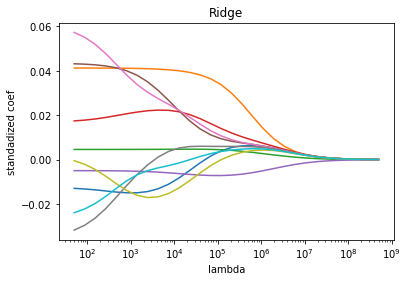

In [ ]:
%%time
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('standadized coef')
plt.title('Ridge')
plt.savefig('ridge.png')

In [ ]:
alphas = 10**np.linspace(-5,0,30)*0.5

In [ ]:
%%time
# sometimes this cell takes a long time
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_trn,Y_trn.values.ravel())
    coefs.append(lasso.coef_)
# print('Shape:',np.shape(coefs)
print('Selected Features:', list(vars.columns[np.where(lasso.coef_!=0)[0]]))

Selected Features: []
CPU times: user 10min 28s, sys: 4.21 s, total: 10min 32s
Wall time: 2min 39s


No handles with labels found to put in legend.


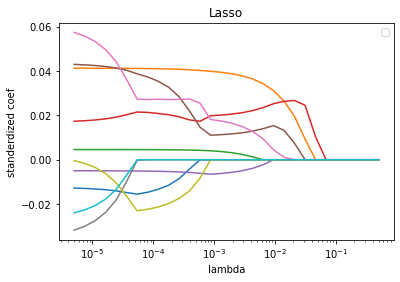

In [ ]:
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('standerdized coef')
plt.title('Lasso')
plt.legend()
plt.savefig('lasso.png')

## Look at PCA

In [ ]:
len(X_trntst.columns)

10

In [ ]:
X_trntst_save = X_trntst.copy()

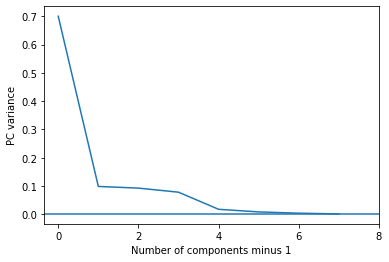

In [ ]:
pca = PCA(n_components = .999, svd_solver = 'full')
pca.fit(X_trntst)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components minus 1')
plt.ylabel('PC variance')
plt.xticks(np.arange(0, len(X_trntst.columns), step=2))
plt.axhline(y=0,xmin=0,xmax=len(X_trntst.columns))
X_trntst = X_trntst_save.copy()

In [ ]:
# We look at the above picture, select how many PCs we want to keep, and then redo the PCA with just this many PCs
pca = PCA(n_components = 6, svd_solver = 'full')
princ_comps = pca.fit_transform(X_trntst)
X_trntst_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)])
X_trntst_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.247388,-0.137037,0.323666,-0.001731,-0.057763,0.004063
1,-0.202519,-0.115640,0.768106,-0.045709,-0.060338,0.009652
2,-0.337125,-0.179832,-0.565214,0.086225,-0.052614,-0.007114
3,-0.292256,-0.158435,-0.120774,0.042247,-0.055189,-0.001526
4,-0.292256,-0.158435,-0.120774,0.042247,-0.055189,-0.001526


In [ ]:
princ_comps = pca.transform(X_oot)
X_oot_orig_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)],index=X_oot.index)
X_oot_orig_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
833507,-0.247388,-0.137037,0.323666,-0.001731,-0.057763,0.004063
833508,-0.426863,-0.222626,-1.454093,0.174180,-0.047465,-0.018292
833509,0.418185,1.042019,0.240957,0.346512,0.785465,-0.297464
833510,-0.381994,-0.201229,-1.009653,0.130202,-0.050040,-0.012703
833511,-0.337125,-0.179832,-0.565214,0.086225,-0.052614,-0.007114


In [ ]:
X_trntst.describe()

,max_count_by_address_30,max_count_by_ssn_30,max_count_by_homephone_7,max_count_by_fulladdress_30,address_count_0_by_7,max_count_by_address_7,max_count_by_fulladdress_3,max_count_by_address_3,max_count_by_address_1,max_count_by_fulladdress_1
count,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000
mean,0.001774,-0.000490,-0.000450,0.001991,-0.000232,0.001611,0.001656,0.001653,0.001664,0.001683
std,1.005450,0.981617,0.998151,1.007109,1.001414,1.012061,1.014183,1.013762,1.017152,1.017417
min,-0.155250,-0.130597,-1.508774,-0.132343,-14.634699,-0.099181,-0.072343,-0.082495,-0.069175,-0.061944
25%,-0.155250,-0.130597,-0.609943,-0.132343,0.114765,-0.099181,-0.072343,-0.082495,-0.069175,-0.061944
50%,-0.155250,-0.130597,-0.160528,-0.132343,0.114765,-0.099181,-0.072343,-0.082495,-0.069175,-0.061944
75%,-0.155250,-0.130597,0.288887,-0.132343,0.114765,-0.099181,-0.072343,-0.082495,-0.069175,-0.061944
max,25.006804,37.765885,12.872514,26.696832,0.114765,28.334590,31.090863,30.606540,34.286573,34.740287


In [ ]:
X_oot_orig_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000
mean,-0.026565,0.004474,0.004908,-0.002622,-0.002848,0.001391
std,2.459009,1.088811,0.968510,0.892951,0.441280,0.298015
min,-0.426863,-7.828976,-5.562343,-11.873788,-6.801517,-4.405797
25%,-0.292256,-0.179832,-0.565214,-0.001731,-0.057763,-0.007114
50%,-0.247388,-0.158435,-0.120774,0.042247,-0.055189,-0.001526
75%,-0.202519,-0.135137,0.323666,0.086225,-0.052614,0.004063
max,81.727018,29.725867,12.767980,15.265878,14.049509,23.836084


In [ ]:
# zscale the PCs
mean = X_trntst_pca.mean()
stdev = X_trntst_pca.std()
X_trntst_pca = (X_trntst_pca - mean)/stdev
X_oot_orig_pca = (X_oot_orig_pca - mean)/stdev

In [ ]:
X_trntst_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,8.335070e+05,8.335070e+05,8.335070e+05,8.335070e+05,8.335070e+05,8.335070e+05
mean,2.759796e-14,-1.578236e-14,-2.068630e-15,1.115084e-15,-1.053249e-14,-1.540734e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.601823e-01,-8.466088e+00,-8.332107e+00,-1.313603e+01,-1.584921e+01,-1.427948e+01
25%,-1.096706e-01,-1.801850e-01,-5.841255e-01,-1.947357e-03,-1.375819e-01,-2.479841e-02
50%,-9.283340e-02,-1.587458e-01,-1.248149e-01,4.753267e-02,-1.314500e-01,-5.317943e-03
75%,-7.599618e-02,-1.158673e-01,3.344956e-01,9.701269e-02,-1.253181e-01,1.416253e-02
max,3.011428e+01,3.522541e+01,1.319519e+01,1.861078e+01,3.301278e+01,8.308602e+01


In [ ]:
X_oot_orig_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000
mean,-0.009969,0.004482,0.005072,-0.002950,-0.006782,0.004849
std,0.922755,1.090950,1.000916,1.004672,1.051051,1.038798
min,-0.160182,-7.844350,-5.748456,-13.359371,-16.200023,-15.357394
25%,-0.109671,-0.180185,-0.584125,-0.001947,-0.137582,-0.024798
50%,-0.092833,-0.158746,-0.124815,0.047533,-0.131450,-0.005318
75%,-0.075996,-0.135403,0.334496,0.097013,-0.125318,0.014163
max,30.668469,29.784240,13.195191,17.175862,33.463473,83.086023


In [ ]:
X_trntst_pca.shape

(833507, 6)

In [ ]:
X_oot_orig_pca.shape

(166493, 6)

## Subsample the larger class if desired

In [ ]:
# set the ratio of goods to bads that you would like. This next line is the ratio of goods to bads that you want for modeling
sample_ratio_desired = 1

temp = X_trntst.copy()
temp['Fraud'] = Y_trntst['Fraud']
temp.head()
goods = temp[temp['Fraud']==0]
bads = temp[temp['Fraud']==1]
actual_bad_fraction = len(bads)/len(temp)
actual_good_fraction = 1 - actual_bad_fraction
print(actual_bad_fraction)
fraction = sample_ratio_desired * actual_bad_fraction
goods_sampled = goods.sample(frac = fraction)
all_sampled = pd.concat([goods_sampled,bads])
all_sampled.sort_index(inplace=True)
Y_trntst_sampled = pd.DataFrame(all_sampled['Fraud'])
X_trntst_sampled = all_sampled.drop(columns=['Fraud'])
del [temp,goods,bads,all_sampled]
gc.collect()
print(X_trntst_sampled.shape,len(Y_trntst_sampled))

0.010456149522938179
(1751, 10) 1751


In [ ]:
niter = 0
nitermax = 5
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Models

You can comment in/out any of these model cells and just explore one model type. You can also just rerun that single cell multiple times (hit shift-enter on that cell) as you manually explore different model hyperparameters.

In [ ]:
Modeling_output = pd.DataFrame(columns=['Model','Trn','Tst','OOT'],index=range(1000))
counter = 0
model_counter = 0

In [ ]:
%%time
# Logistic regression

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = LogisticRegression(max_iter=500, penalty = 'l2', C = 3, solver = 'lbfgs')

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['log reg',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.6274509803921569 0.5895522388059702 0.4972067039106145
1 0.631404958677686 0.6 0.5027932960893855
2 0.6132231404958678 0.6072727272727273 0.39106145251396646
3 0.60828025477707 0.626984126984127 0.5083798882681564
4 0.6065573770491803 0.6407407407407407 0.5027932960893855
trn    0.617383
tst    0.612910
oot    0.480447
dtype: float64
CPU times: user 2.3 s, sys: 1.4 s, total: 3.69 s
Wall time: 2 s


In [ ]:
%%time
# Single DT

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = DecisionTreeClassifier(min_samples_split=1000,min_samples_leaf=5, criterion = 'gini', splitter='best')

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['DT',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.7878787878787878 0.6818181818181818 0.5586592178770949
1 0.7677100494233937 0.7032967032967034 0.547486033519553
2 0.7681159420289855 0.7335907335907336 0.5586592178770949
3 0.7887096774193548 0.75 0.5698324022346368
4 0.7426229508196721 0.7592592592592593 0.5418994413407822
trn    0.771007
tst    0.725593
oot    0.555307
dtype: float64
CPU times: user 6.06 s, sys: 5.89 ms, total: 6.07 s
Wall time: 6.92 s


In [ ]:
%%time
# RF

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = RandomForestClassifier(n_estimators=100,min_samples_split=1000,min_samples_leaf=20,max_features=8, criterion = 'gini')
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['RF',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.7658862876254181 0.723404255319149 0.5642458100558659
1 0.7674418604651163 0.7697841726618705 0.5642458100558659
2 0.7689822294022617 0.7662835249042146 0.5586592178770949
3 0.770096463022508 0.748062015503876 0.5642458100558659
4 0.7843450479233227 0.7598425196850394 0.5642458100558659
trn    0.771350
tst    0.753475
oot    0.563128
dtype: float64
CPU times: user 3min 7s, sys: 303 ms, total: 3min 8s
Wall time: 3min 7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0 0.7435483870967742 0.6346153846153846 0.45251396648044695
1 0.6633165829145728 0.6749116607773852 0.4301675977653631
2 0.7288676236044657 0.691699604743083 0.40782122905027934
3 0.6986970684039088 0.6992481203007519 0.5418994413407822
4 0.678513731825525 0.6436781609195402 0.35195530726256985
loop trn tst oot 5 0.7025886787690492 0.6688305862712289 0.4368715083798883


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0 0.7929373996789727 0.7470817120622568 0.45251396648044695


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.801948051948052 0.7689393939393939 0.29608938547486036


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


2 0.7694859038142621 0.7436823104693141 0.27932960893854747


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.7863924050632911 0.7459677419354839 0.35195530726256985


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


4 0.8218298555377207 0.7470817120622568 0.30726256983240224
loop trn tst oot 10 0.7945187232084597 0.7505505740937412 0.3374301675977654


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0 0.819935691318328 0.7325581395348837 0.329608938547486


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.8482003129890454 0.7302904564315352 0.24581005586592178


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


2 0.8481421647819063 0.789272030651341 0.3016759776536313


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.8393700787401575 0.7387755102040816 0.24581005586592178


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


4 0.8485342019543974 0.7180451127819549 0.2737430167597765
loop trn tst oot 15 0.8408364899567669 0.7417882499207593 0.27932960893854747


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0 0.855973813420622 0.7026022304832714 0.2905027932960894


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.856682769726248 0.7606177606177607 0.26256983240223464


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


2 0.8864 0.7607843137254902 0.2849162011173184


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.8435940099833611 0.7204301075268817 0.3128491620111732


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


4 0.862876254180602 0.723404255319149 0.3854748603351955
loop trn tst oot 20 0.8611053694621666 0.7335677335345105 0.3072625698324022


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0 0.9011164274322169 0.7075098814229249 0.27932960893854747


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.8450244698205547 0.7602996254681648 0.22905027932960895


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


2 0.8752025931928687 0.7452471482889734 0.22346368715083798


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.8306188925081434 0.7556390977443609 0.3687150837988827


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


4 0.8637137989778535 0.7235494880546075 0.26256983240223464
loop trn tst oot 25 0.8631352363863275 0.7384490481958064 0.2726256983240224


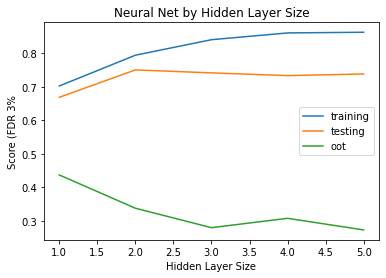

In [ ]:
training = []
testing = []
oot = []
results = pd.DataFrame(np.zeros((niter,3)),columns=['trn','tst','oot'])
for i in range(5,30,5):
    for niter in range(nitermax):
        X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

        model = MLPClassifier(hidden_layer_sizes=(i,i,i,i),activation='relu',alpha=0.001, solver = 'lbfgs',learning_rate_init=.001, max_iter=1000)

        model.fit(X_trn, Y_trn.values.ravel())
        X_oot = X_oot_orig.copy()
        X_trn_save = X_trn.copy()
        Y_trn_save = Y_trn.copy()

        predictions = model.predict_proba(X_trn_save)[:,1]
        X_trn['predicted'] = predictions
        X_trn['Fraud'] = Y_trn_save['Fraud']
        topRows = int(round(X_trn.shape[0]*0.03))
        temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
        needed = temp.loc[:,'Fraud']
        results.loc[niter,'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])
        predictions = model.predict_proba(X_tst)[:,1]
        X_tst['predicted']=predictions
        X_tst['Fraud'] = Y_tst['Fraud']
        topRows = int(round(X_tst.shape[0]*0.03))
        temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
        needed = temp.loc[:,'Fraud']
        results.loc[niter,'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])
        predictions = model.predict_proba(X_oot)[:,1]
        X_oot['predicted']=predictions
        X_oot['Fraud'] = Y_oot['Fraud']
        topRows = int(round(X_oot.shape[0]*0.03))
        temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
        needed = temp.loc[:,'Fraud']
        results.loc[niter,'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
        print(niter, results.loc[niter,'trn'],results.loc[niter,'tst'],results.loc[niter,'oot'],)
    results_mean_trn = results['trn'].mean()
    results_mean_tst = results['tst'].mean()
    results_mean_oot = results['oot'].mean()
    print('loop', 'trn', 'tst', 'oot', i, results_mean_trn, results_mean_tst, results_mean_oot)
    training.append(results_mean_trn)
    testing.append(results_mean_tst)
    oot.append(results_mean_oot)
table=pd.DataFrame({'n': range(1,len(training)+1),'training':training,'testing':testing,'oot':oot})
table.set_index('n',inplace=True)
table.plot()
plt.savefig('complexity_NN.pdf', format='pdf')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Score (FDR 3%')
plt.title('Neural Net by Hidden Layer Size')
plt.show()


In [ ]:
%%time
# LGBM

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier(num_leaves=1000,n_estimators=100, boosting_type='GOSS',min_data_in_leaf=1000)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
0 0.8941176470588236 0.8280701754385965 0.547486033519553
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
1 0.8798751950078003 0.8242677824267782 0.5251396648044693
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
2 0.8934169278996865 0.8140495867768595 0.5642458100558659
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
3 0.8850574712643678 0.8302583025830258 0.5586592178770949
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
4 0.8763866877971473 0.8313253012048193 0.553072625698324
trn    0.885771
tst    0.825594
oot    0.549721
dtype: float64
CPU times: use

In [ ]:
%%time
# NN

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = MLPClassifier(hidden_layer_sizes=(50),activation='relu',alpha=0.1,learning_rate='constant',solver='adam',max_iter=100)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['NN',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.652317880794702 0.6630434782608695 0.5418994413407822
1 0.6556836902800659 0.6483516483516484 0.5418994413407822
2 0.6375404530744336 0.6984732824427481 0.5418994413407822
3 0.662828947368421 0.6433823529411765 0.5418994413407822
4 0.6591639871382636 0.6472868217054264 0.5418994413407822
trn    0.653507
tst    0.660108
oot    0.541899
dtype: float64
CPU times: user 1min 1s, sys: 51 s, total: 1min 52s
Wall time: 1min 7s


In [ ]:
%%time
# Catboost

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = CatBoostClassifier(verbose=0, max_depth=10, iterations=100, bootstrap_type='Bayesian',learning_rate=0.05)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['cat boost',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.750402576489533 0.7567567567567568 0.5586592178770949
1 0.7820945945945946 0.7361111111111112 0.553072625698324
2 0.7533333333333333 0.75 0.5642458100558659
3 0.7704654895666132 0.7509727626459144 0.553072625698324
4 0.7808441558441559 0.6931818181818182 0.553072625698324
trn    0.767428
tst    0.737404
oot    0.556425
dtype: float64
CPU times: user 40.1 s, sys: 1.16 s, total: 41.2 s
Wall time: 27 s


In [ ]:
%%time
# XGB

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = xgb.XGBClassifier(max_depth=5, n_estimators=300, tree_method='auto',min_child_weight=100,
                               subsample=1, booster='gbtree')

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['XGB',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.8038897893030794 0.7452471482889734 0.5586592178770949
1 0.7977346278317152 0.7862595419847328 0.5586592178770949
2 0.8213716108452951 0.8063241106719368 0.553072625698324
3 0.7951070336391437 0.7787610619469026 0.553072625698324
4 0.8039867109634552 0.7446043165467626 0.547486033519553
trn    0.804418
tst    0.772239
oot    0.554190
dtype: float64
CPU times: user 1min 24s, sys: 161 ms, total: 1min 24s
Wall time: 49.6 s


In [ ]:
# %%time
# # Knn
# # Knn can be very slow with a lot of records.

# FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
# for niter in range(nitermax):
#     X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

#     model = KNeighborsClassifier(n_neighbors=50)

#     X_oot = X_oot_orig.copy()
#     X_trn_save = X_trn.copy()
#     Y_trn_save = Y_trn.copy()

#     model.fit(X_trn, Y_trn.values.ravel())

#     predictions = model.predict_proba(X_trn_save)[:,1]
#     X_trn['predicted'] = predictions
#     X_trn['Fraud'] = Y_trn_save['Fraud']
#     topRows = int(round(X_trn.shape[0]*0.03))
#     temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_tst)[:,1]
#     X_tst['predicted']=predictions
#     X_tst['Fraud'] = Y_tst['Fraud']
#     topRows = int(round(X_tst.shape[0]*0.03))
#     temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_oot)[:,1]
#     X_oot['predicted']=predictions
#     X_oot['Fraud'] = Y_oot['Fraud']
#     topRows = int(round(X_oot.shape[0]*0.03))
#     temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
#     print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
#     Modeling_output.iloc[counter] = ['Knn',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
#     counter = counter + 1

# print(FDR3.mean())
# model_counter = model_counter + 1

In [ ]:
# %%time
# # SVM
# # SVM can be very slow. It scales like the # training records cubed

# FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
# for niter in range(nitermax):
#     X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

#     model = svm.SVC(
#         C=.1,
# #         gamma=100,
# #         kernel='linear',
#         kernel='poly',
#         probability=True)

#     X_oot = X_oot_orig.copy()
#     X_trn_save = X_trn.copy()
#     Y_trn_save = Y_trn.copy()

#     model.fit(X_trn, Y_trn.values.ravel())

#     predictions = model.predict_proba(X_trn_save)[:,1]
#     X_trn['predicted'] = predictions
#     X_trn['Fraud'] = Y_trn_save['Fraud']
#     topRows = int(round(X_trn.shape[0]*0.03))
#     temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_tst)[:,1]
#     X_tst['predicted']=predictions
#     X_tst['Fraud'] = Y_tst['Fraud']
#     topRows = int(round(X_tst.shape[0]*0.03))
#     temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_oot)[:,1]
#     X_oot['predicted']=predictions
#     X_oot['Fraud'] = Y_oot['Fraud']
#     topRows = int(round(X_oot.shape[0]*0.03))
#     temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
#     print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
#     Modeling_output.iloc[counter] = ['SVM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
#     counter = counter + 1

# print(FDR3.mean())
# model_counter = model_counter + 1

## Model comparison plots

In [ ]:
df = Modeling_output.dropna()
df.head(20)

,Model,Trn,Tst,OOT
0,log reg,0.616667,0.614286,0.486034
1,log reg,0.620192,0.585938,0.391061
2,log reg,0.603252,0.645283,0.49162
3,log reg,0.614767,0.607004,0.452514
4,log reg,0.617496,0.602694,0.480447
5,log reg,0.613893,0.628352,0.497207
6,log reg,0.608903,0.613546,0.502793
7,log reg,0.602024,0.620209,0.391061
8,log reg,0.596721,0.655556,0.480447
9,log reg,0.589577,0.661654,0.50838


In [ ]:
df.shape

(310, 4)

In [ ]:
df_unpivot = df.melt( id_vars='Model', value_vars=['Trn','Tst','OOT'], var_name=['Type'], value_name='Value')
df_unpivot.head()

,Model,Type,Value
0,log reg,Trn,0.616667
1,log reg,Trn,0.620192
2,log reg,Trn,0.603252
3,log reg,Trn,0.614767
4,log reg,Trn,0.617496


In [ ]:
df_compare = df_unpivot[(df_unpivot['Type']=='Trn') | (df_unpivot['Type']=='Tst') | (df_unpivot['Type']=='OOT')]
df_compare.head()

,Model,Type,Value
0,log reg,Trn,0.616667
1,log reg,Trn,0.620192
2,log reg,Trn,0.603252
3,log reg,Trn,0.614767
4,log reg,Trn,0.617496


In [ ]:
output = df.groupby('Model').agg({'Trn':['mean','std'],'Tst':['mean','std'],'OOT':['mean','std']})
output

Trn                 Tst                 OOT          
               mean       std      mean       std      mean       std
Model                                                                
DT         0.742142  0.039926  0.693354  0.039754  0.524441  0.045371
LGBM       0.965084  0.042937  0.823308  0.028103  0.393371  0.098122
NN         0.668488  0.036107  0.664572  0.039136  0.497952  0.091840
RF         0.799249  0.027523  0.750818  0.036239  0.561453  0.003197
XGB        0.802888  0.064883  0.766797  0.047189  0.536173  0.035276
cat boost  0.749334  0.086283  0.719783  0.072604  0.507821  0.056046
log reg    0.613898  0.010545  0.612099  0.023397  0.474302  0.035193

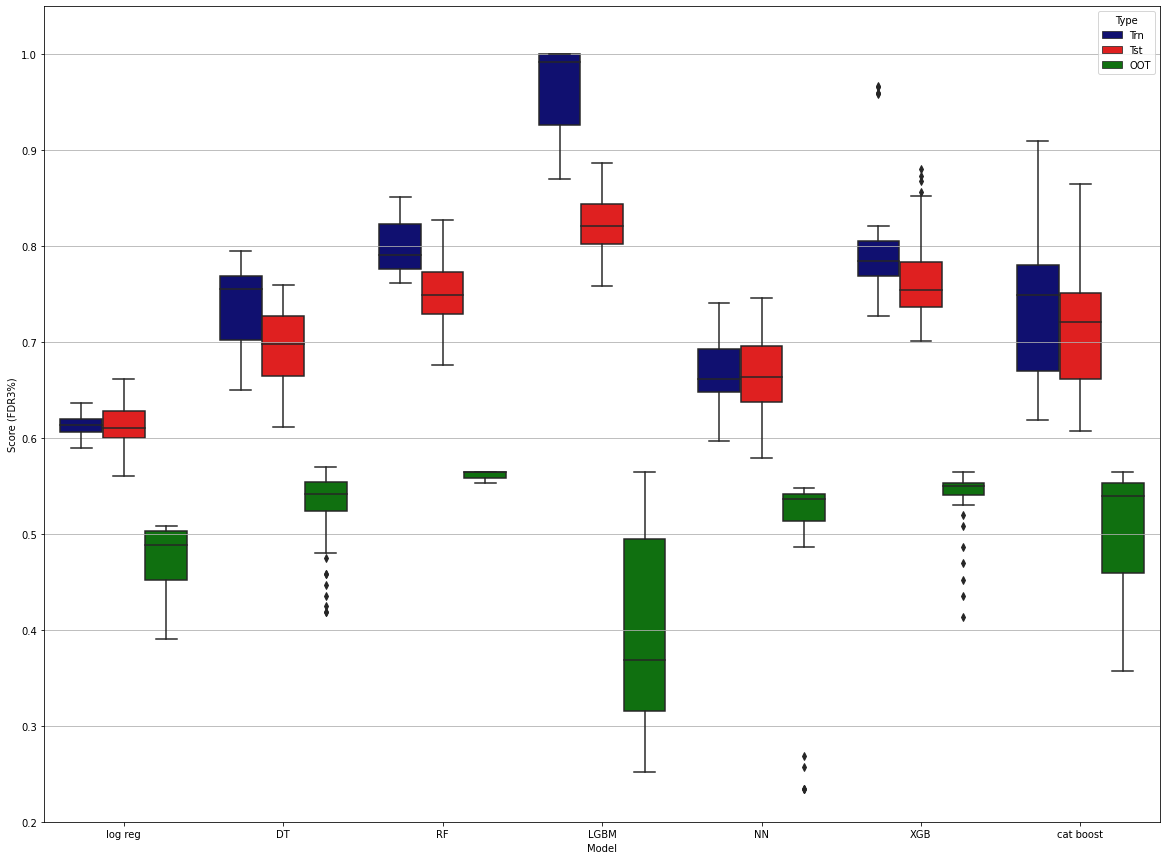

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
ax = sns.boxplot(x='Model',y='Value',hue='Type', data=df_compare, palette=['navy','r','g'])

plt.ylim(.2,1.05)
plt.ylabel('Score (FDR3%)')
plt.grid(axis='y')
plt.savefig('modeling.png')
plt.show()

In [ ]:
print('duration: ', datetime.now() - start_time)

duration:  4:29:15.989420


The rest of the notebook makes the tables for your final model of choice. You need to run that final model only once (no CV). If you want you can run the below cell over and over by itself until it gives you a model you like (due to the stochastic nature of some ML algorithms, but you can't change from your best hyperparameters.

In [ ]:
%%time

for niter in range(30):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# here's where you put your final model of choice
    model = RandomForestClassifier(n_estimators=100,min_samples_split=1000,min_samples_leaf=20,max_features=8, criterion = 'gini')

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    if(FDR3.loc[niter, 'oot'] > .564): break

print(FDR3.mean())
model_counter = model_counter + 1

0 0.7351524879614767 0.7159533073929961 0.5642458100558659
trn    0.765204
tst    0.751985
oot    0.563128
dtype: float64
CPU times: user 37.3 s, sys: 24.9 ms, total: 37.4 s
Wall time: 37.2 s


In [ ]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [ ]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,card_merch_total_14,card_zip3_max_14,Card_Merchdesc_count_7,merch_zip_max_7,Card_Merchnum_desc_avg_7,Card_Merchnum_desc_max_1,Card_Merchdesc_max_1,Card_Merchnum_desc_max_3,merch_zip_med_0,card_zip_max_0,predicted,Fraud
89091,5.725968,2.844300,0.496246,2.093019,0.857191,0.965944,0.964574,0.953427,0.000242,1.051114,0.584945,1
89075,5.122842,2.844300,-0.285731,2.093019,0.106031,0.051662,0.050792,0.043124,1.074207,3.413691,0.584945,1
89129,7.122360,2.844300,-0.025072,2.093019,0.038051,0.051662,0.050792,0.043124,0.077530,1.790165,0.584945,1
89112,5.838117,2.844300,0.756905,2.093019,0.702802,0.965944,0.964574,0.953427,0.056727,1.051114,0.584945,1
89134,9.184338,7.148446,0.235587,5.577600,-0.017362,0.051662,0.050792,0.043124,0.077530,8.407200,0.584945,1
89114,6.341771,2.844300,3.624153,2.093019,1.223948,3.157232,3.154663,3.135180,0.113213,1.790165,0.576839,1
88278,5.986504,21.154344,-0.025072,16.916593,15.708318,22.859737,22.846393,22.751958,16.514372,24.656316,0.576839,0
89077,5.249519,2.844300,2.842176,2.093019,1.363026,3.157232,3.154663,3.135180,1.045657,3.413691,0.576839,1
89083,5.388373,2.844300,3.363494,2.093019,1.162726,3.157232,3.154663,3.135180,-0.122436,-0.043396,0.576839,1
89074,5.006737,2.844300,2.581517,2.093019,1.463146,3.157232,3.154663,3.135180,1.102758,3.413691,0.576839,1


In [ ]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot

    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,122.0,61.0,61.0,50.000000,50.000000,122.0,61.0,61.0,0.505930,34.078212,33.572282,1.000000
2,2.0,123.0,88.0,35.0,71.544715,28.455285,245.0,149.0,96.0,1.235797,53.631285,52.395488,1.552083
3,3.0,122.0,117.0,5.0,95.901639,4.098361,367.0,266.0,101.0,2.206187,56.424581,54.218394,2.633663
4,4.0,122.0,122.0,0.0,100.000000,0.000000,489.0,388.0,101.0,3.218048,56.424581,53.206533,3.841584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,123.0,123.0,0.0,100.000000,0.000000,11747.0,11570.0,177.0,95.960853,98.882682,2.921829,65.367232
97,97.0,122.0,121.0,1.0,99.180328,0.819672,11869.0,11691.0,178.0,96.964419,99.441341,2.476922,65.679775
98,98.0,122.0,122.0,0.0,100.000000,0.000000,11991.0,11813.0,178.0,97.976279,99.441341,1.465061,66.365169
99,99.0,123.0,123.0,0.0,100.000000,0.000000,12114.0,11936.0,178.0,98.996434,99.441341,0.444907,67.056180


In [ ]:
FDR3.to_csv('FDR3.csv')

In [ ]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

plt.savefig('savings.png',format='png')

Max possible savings:21,252,000.0


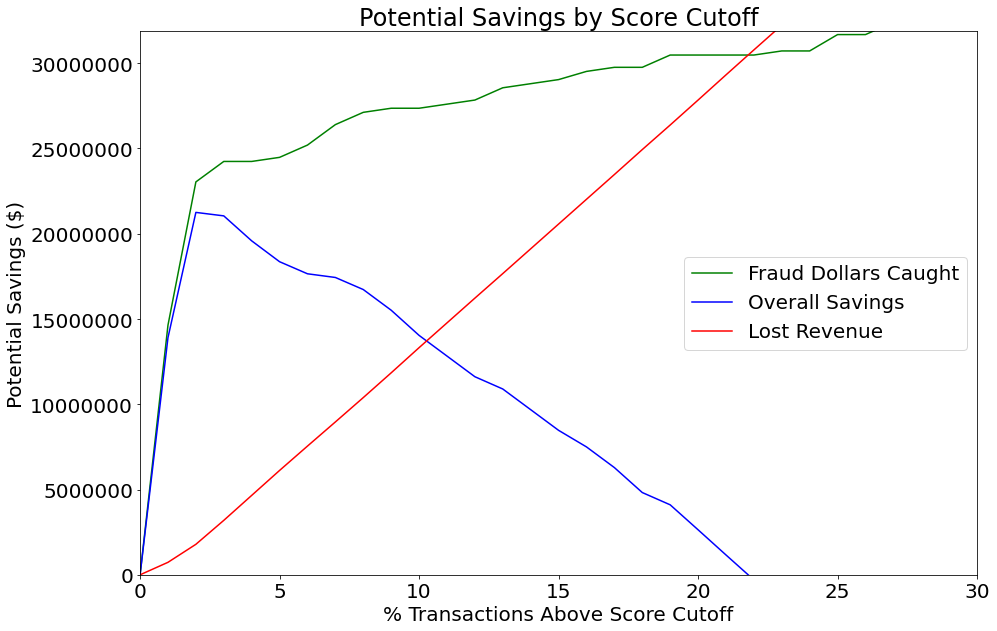

In [ ]:
cost_fraud = 400
cost_fp = 20
xoot = 12/2 *10000000/100000
Financials_oot = pd.DataFrame(np.zeros((101,3)), columns = ['Fraud Savings','FP Loss','Overall Savings'])
for i in range(101):
  Financials_oot.loc[i,'Fraud Savings'] = FDR_oot.loc[i,'cb'] * cost_fraud * xoot
  Financials_oot.loc[i,'FP Loss'] = FDR_oot.loc[i,'cg'] * cost_fp * xoot
  Financials_oot.loc[i,'Overall Savings'] = Financials_oot.loc[i,'Fraud Savings'] - Financials_oot.loc[i,'FP Loss']

max_savings = Financials_oot['Overall Savings'].max(0)
print('Max possible savings:'+'{:,}'.format(max_savings))
yupper = max_savings * 1.5
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))
plt.plot(Financials_oot['Fraud Savings'],color='green',label='Fraud Dollars Caught')
plt.plot(Financials_oot['Overall Savings'],color='blue',label='Overall Savings')
plt.plot(Financials_oot['FP Loss'],color='red',label='Lost Revenue')
plt.xlim(0,30)
plt.ylim(0,yupper)
plt.ticklabel_format(style='plain')
plt.xlabel('% Transactions Above Score Cutoff')
plt.ylabel('Potential Savings ($)')
plt.title('Potential Savings by Score Cutoff')
plt.legend()
plt.savefig('savings.png',format='png')
plt.show()

In [ ]:
print("duration: ", datetime.now() - start_time)

duration:  0:05:39.437525
